**Prática de Realce e detecção de borda**

Exercícios retirados de:
http://homepages.inf.ed.ac.uk/rbf/HIPR2/featops.htm



In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import convolve

1) Aplique os filtros de realce Sobel e Roberts nas imagens abaixo. Mostre, para o caso do Sobel, uma imagem representando a derivada em x e outra imagem representando a derivada em y

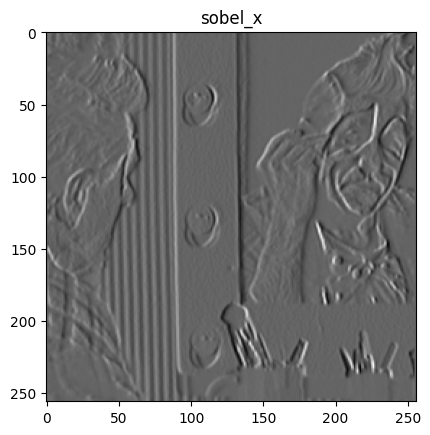

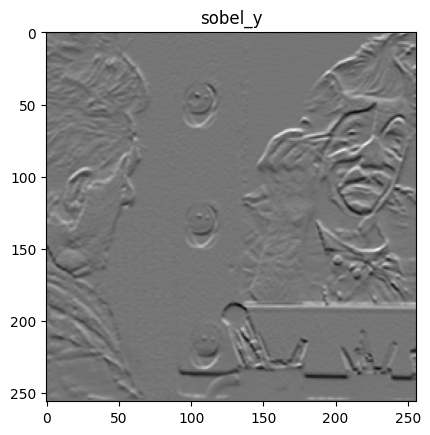

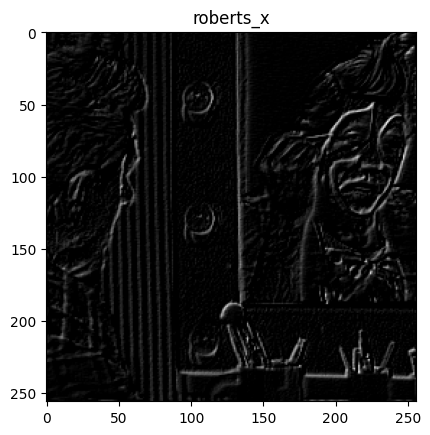

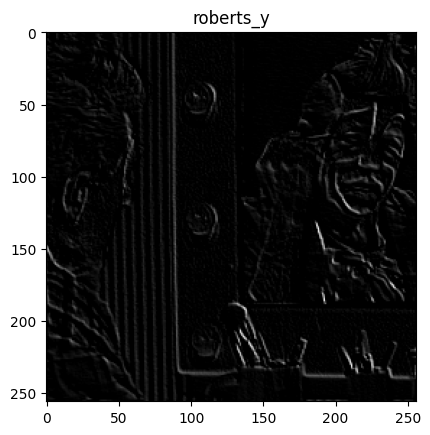

In [8]:
# Carregar a imagem
imagem = cv2.imread('cln1.png', cv2.IMREAD_GRAYSCALE)

# Aplicar o filtro Sobel para obter a derivada em x e em y
sobel_x = cv2.Sobel(imagem, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(imagem, cv2.CV_64F, 0, 1, ksize=3)

# Exibir a imagem da derivada em x
plt.title('sobel_x')
plt.imshow(sobel_x, cmap='gray')
plt.show()

# Exibir a imagem da derivada em y
plt.title('sobel_y')
plt.imshow(sobel_y, cmap='gray')
plt.show()

# Definicao do kernel apra aplicar Roberts
roberts_x = np.array([[0, 0, 0], [0, 1, 0], [0, 0, -1]], dtype=np.float32)
roberts_y = np.array([[0, 0, 0], [0, 0, 1], [0, -1, 0]], dtype=np.float32)

# filtro roberts para derivada x e y
roberts_x = cv2.filter2D(imagem, -1, roberts_x)
roberts_y = cv2.filter2D(imagem, -1, roberts_y)

# Exibir a imagem da derivada em x (Roberts)
plt.title('roberts_x')
plt.imshow(roberts_x, cmap='gray')
plt.show()

# Exibir a imagem da derivada em y
plt.title('roberts_y')
plt.imshow(roberts_y, cmap='gray')
plt.show()

2) Utilizando a imagem do exercício anterior, realce as bordas utilizando (a) Filtro Laplaciano. (b) Unsharp masking. (c) Highboost filtering (escolher um k). (d) K <1 para atenuar

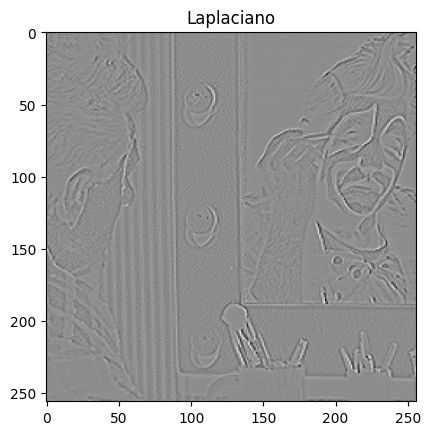

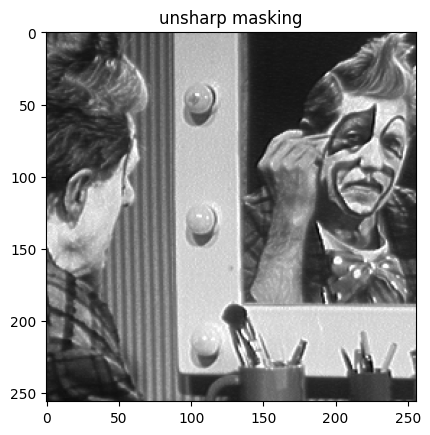

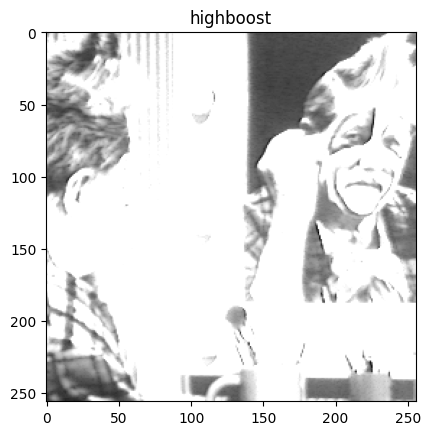

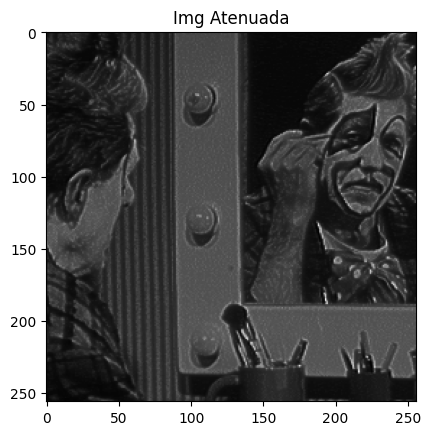

In [11]:
img1 = cv2.imread("cln1.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255);


#Laplaciano
laplaciano = cv2.Laplacian(imagem, cv2.CV_64F)

#Unsharp Masking
# Aplicar filtro gausiano
img_blur = cv2.GaussianBlur(imagem, (5, 5), 0)

# Calcula a máscara
máscara = cv2.subtract(imagem, img_blur)

# Realce de borda
unsharp_masking = cv2.add(imagem, máscara)

# (c) Highboost Filtering com k = 2
k = 2
# Aplicar o filtro de desfoque (blur)
img_blur = cv2.GaussianBlur(imagem, (5, 5), 0)

# Calcular a máscara de detalhes multiplicada pelo fator k
máscara = cv2.subtract(imagem, blurred)
highboost = cv2.addWeighted(imagem, 1 + k, máscara, -k, 0)

k = 0.2
# Aplicar o filtro de desfoque (blur)
img_blur = cv2.GaussianBlur(imagem, (5, 5), 0)

# Calcular a máscara de detalhes multiplicada pelo fator k
máscara = cv2.subtract(imagem, img_blur)
attenuation = cv2.addWeighted(imagem, k, máscara, 1 - k, 0)


plt.title('Laplaciano')
plt.imshow(laplaciano, cmap='gray')
plt.show()

plt.title('unsharp masking')
plt.imshow(unsharp_masking, cmap='gray')
plt.show()

plt.title('highboost')
plt.imshow(highboost, cmap='gray')
plt.show()

plt.title('Img Atenuada')
plt.imshow(attenuation, cmap='gray')
plt.show()

3) Aplique o operador Sobel imagem original abaixo e obtenha as outras imagens conforme descrição. We can see that the intensity of many pixels on the surface is as high as along the actual edges. One reason is that the output of many edge pixels is greater than the maximum pixel value and therefore they are `cut off' at 255. To avoid this overflow we scale the range image by a factor 0.25 prior to the edge detection and then normalize the output, as can be seen in (c)

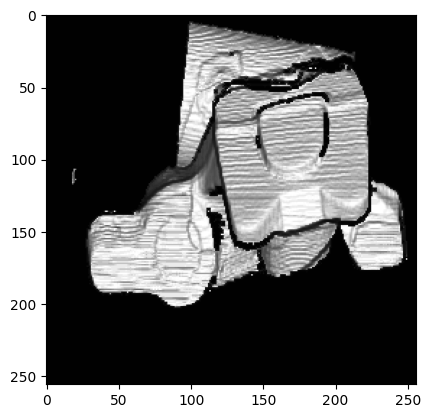

In [59]:
#code here
img1 = cv2.imread("ren1.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray', vmin=0, vmax=255);


4) Aplique o operador Sobel imagem original abaixo e obtenha a imagem binária após a limiarização utilizando o valor 150

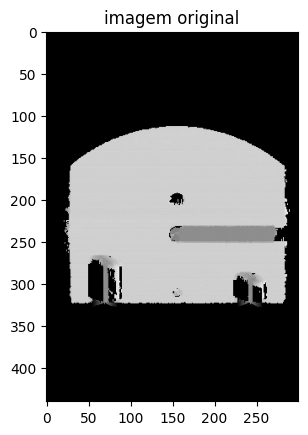

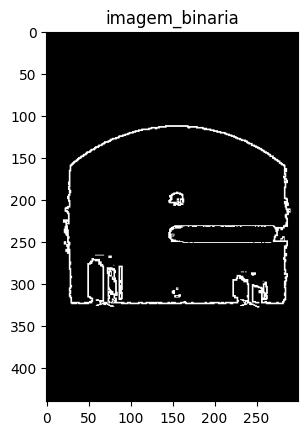

In [14]:
img1 = cv2.imread("ufo2.png", cv2.IMREAD_GRAYSCALE)

sobel_x = cv2.Sobel(img1, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img1, cv2.CV_64F, 0, 1, ksize=3)

magnitude = cv2.magnitude(sobel_x, sobel_y)

# Limiarizar a imagem
limiar, imagem_binaria = cv2.threshold(magnitude, 150, 255, cv2.THRESH_BINARY)

# img após a limiarização
plt.title('imagem original')
plt.imshow(img1, cmap='gray')
plt.show()

plt.title('imagem binaria')
plt.imshow(imagem_binaria, cmap='gray')
plt.show()

5) Aplique o operador Sobel imagem original abaixo e obtenha a imagem binária após a limiarização utilizando o valor 150

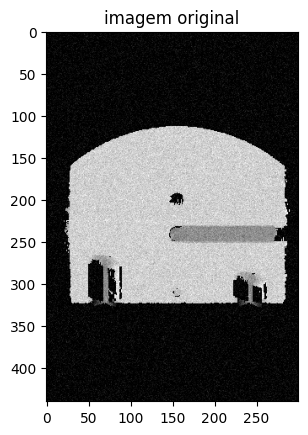

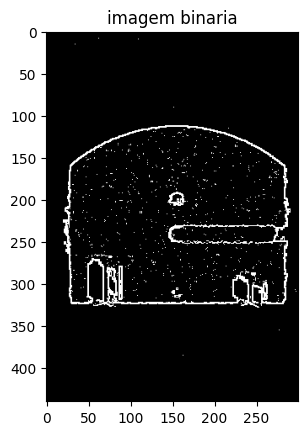

In [16]:
img1 = cv2.imread("ufo2noi2.png", cv2.IMREAD_GRAYSCALE)

sobel_x = cv2.Sobel(img1, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img1, cv2.CV_64F, 0, 1, ksize=3)

magnitude = cv2.magnitude(sobel_x, sobel_y)

# Limiarizar a imagem
limiar, imagem_binaria = cv2.threshold(magnitude, 150, 255, cv2.THRESH_BINARY)

# img após a limiarização
plt.title('imagem original')
plt.imshow(img1, cmap='gray')
plt.show()

plt.title('imagem binaria')
plt.imshow(imagem_binaria, cmap='gray')
plt.show()